<a href="https://colab.research.google.com/github/hvr2026/Decision-trees/blob/main/GBM%20method/Classic_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, mean_squared_error
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [3]:
# Inspect the data
print("Dataset shape:", diabetes_data.shape)
print("First few rows of the dataset:")
display(diabetes_data.head())


Dataset shape: (15000, 10)
First few rows of the dataset:


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
# Separate features and target
X = diabetes_data.drop(columns=["PatientID", "Diabetic"])
y = diabetes_data["Diabetic"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


<ipython-input-5-c03094a88a00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diabetic", data=diabetes_data, palette="pastel")


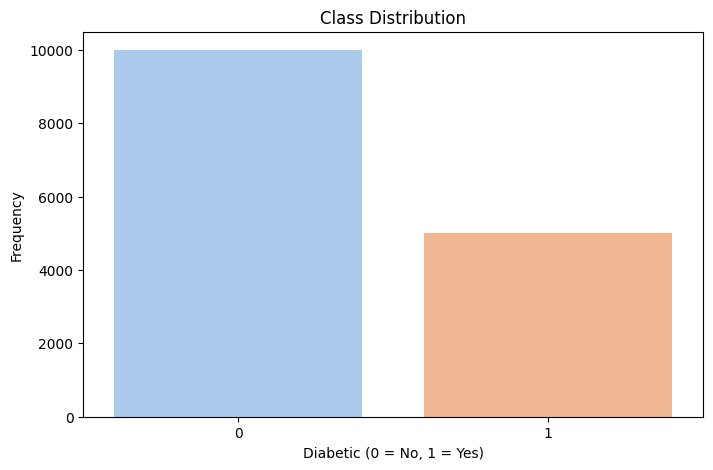

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.countplot(x="Diabetic", data=diabetes_data, palette="pastel")
plt.title("Class Distribution")
plt.xlabel("Diabetic (0 = No, 1 = Yes)")
plt.ylabel("Frequency")
plt.show()


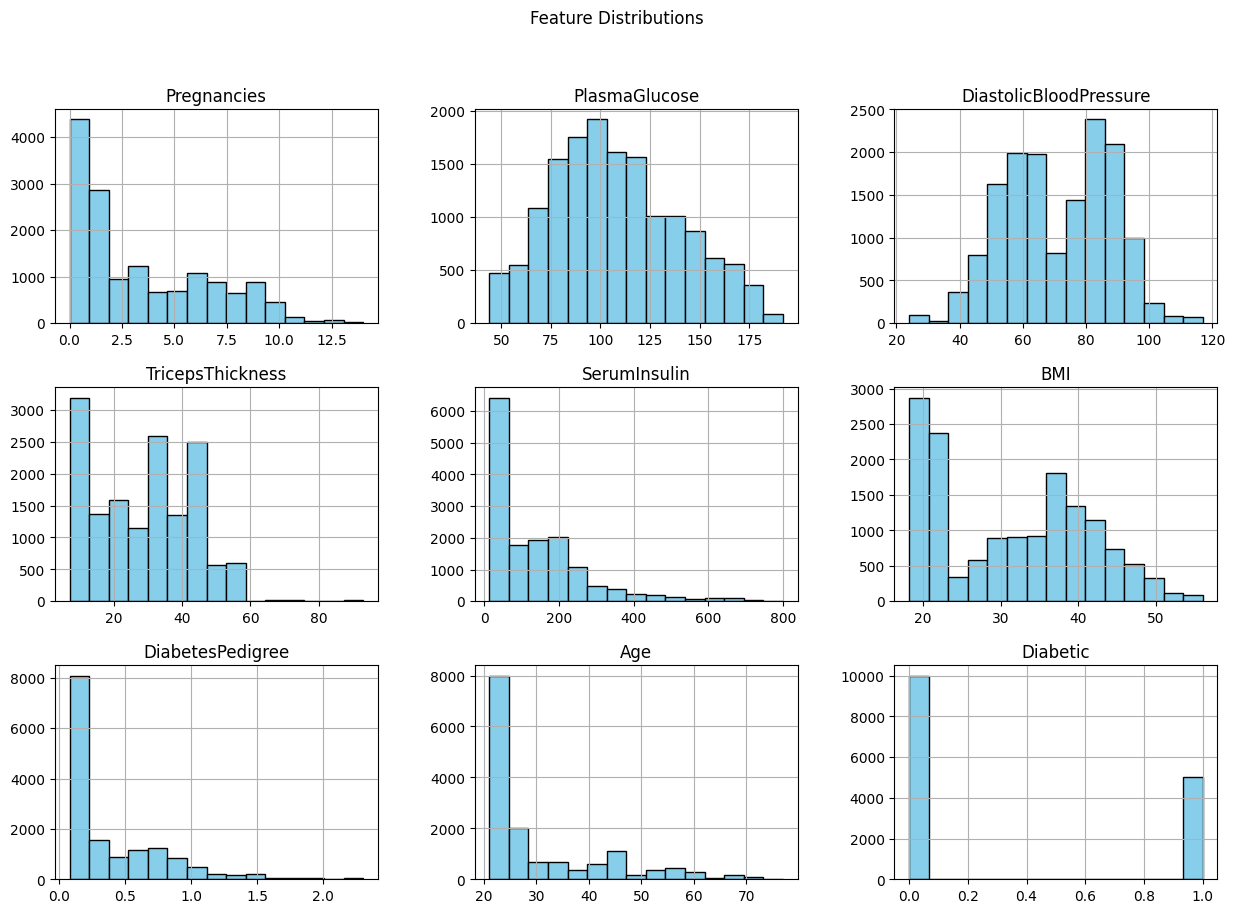

In [6]:
# Feature distributions
diabetes_data.drop(columns=["PatientID"]).hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


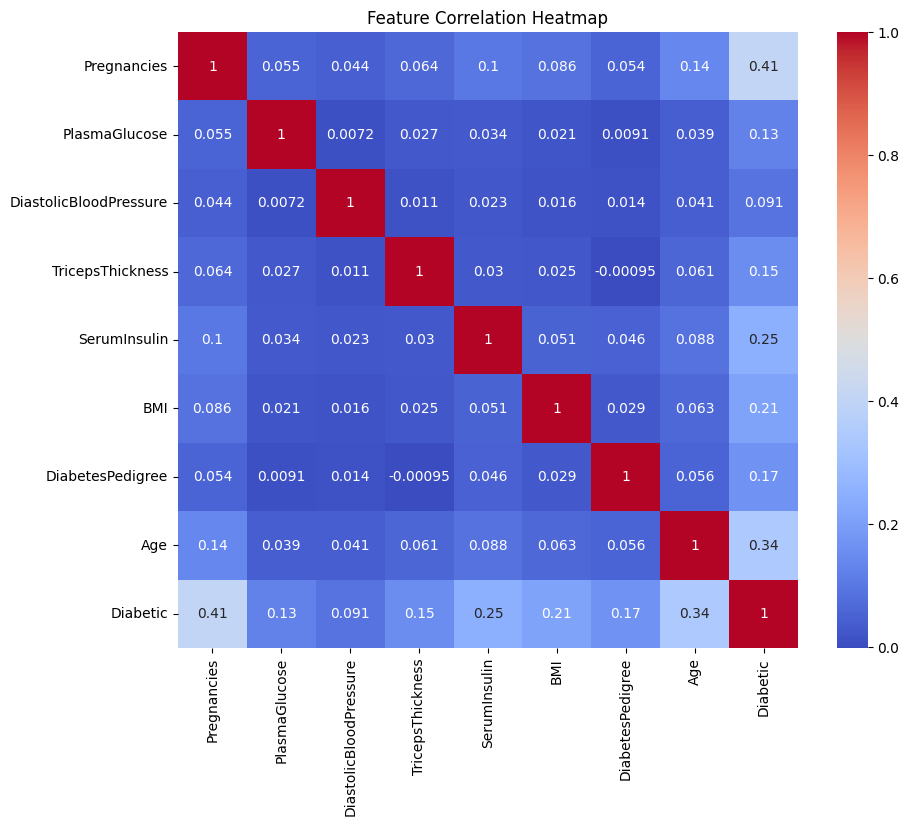

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.drop(columns=["PatientID"]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# Implement Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [9]:
# Predictions
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

In [10]:
# Model Evaluation
train_accuracy = gb_clf.score(X_train, y_train)
test_accuracy = gb_clf.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.96
Testing Accuracy: 0.95


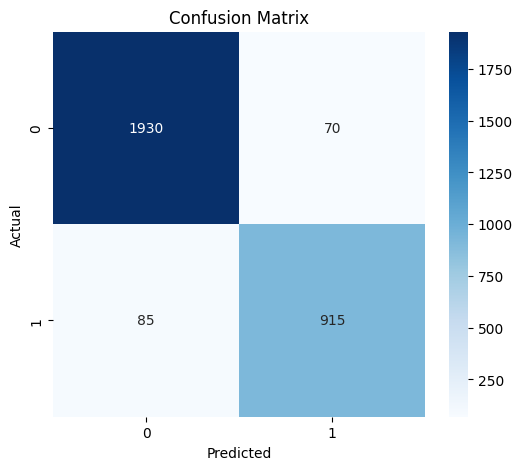

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

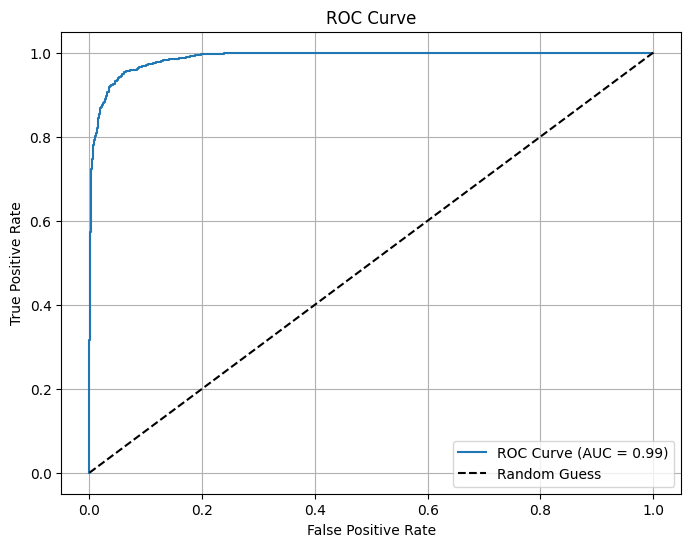

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


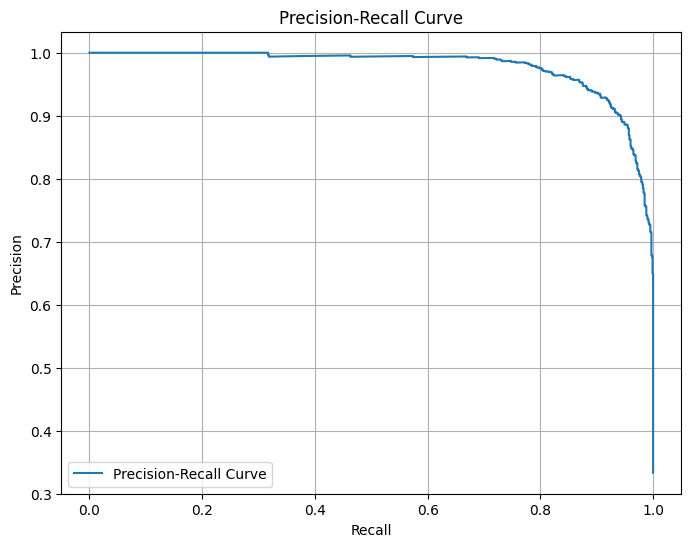

In [13]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

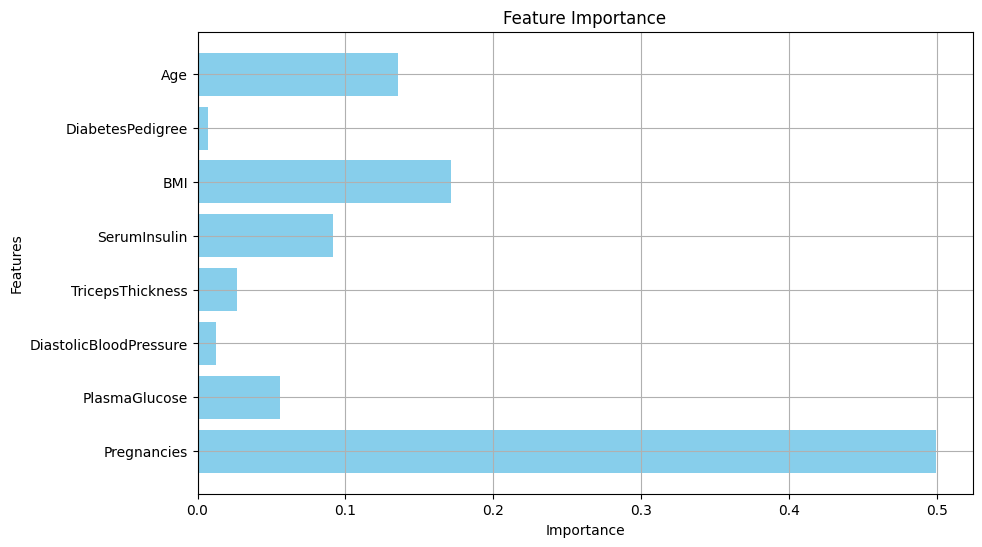

In [14]:
# Feature Importance
feature_importance = gb_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()


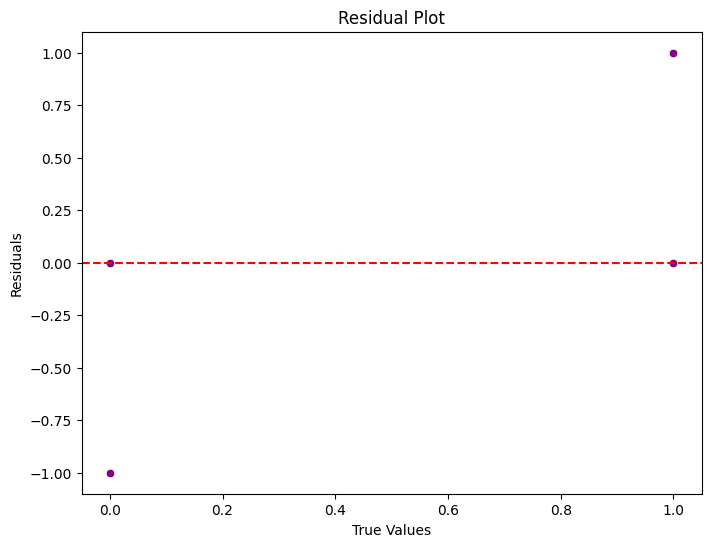

In [15]:
# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

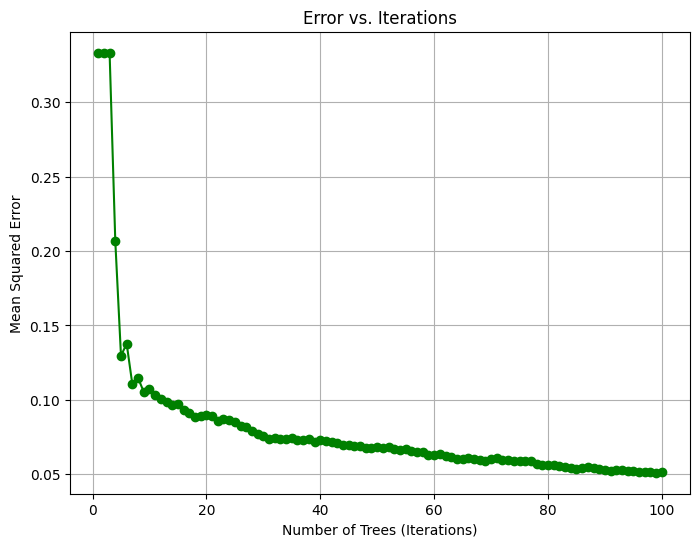

In [17]:
# Error vs. Iterations
errors = [
    mean_squared_error(y_test, pred) for pred in gb_clf.staged_predict(X_test)
]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(errors) + 1), errors, marker="o", color="green")
plt.title("Error vs. Iterations")
plt.xlabel("Number of Trees (Iterations)")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.show()

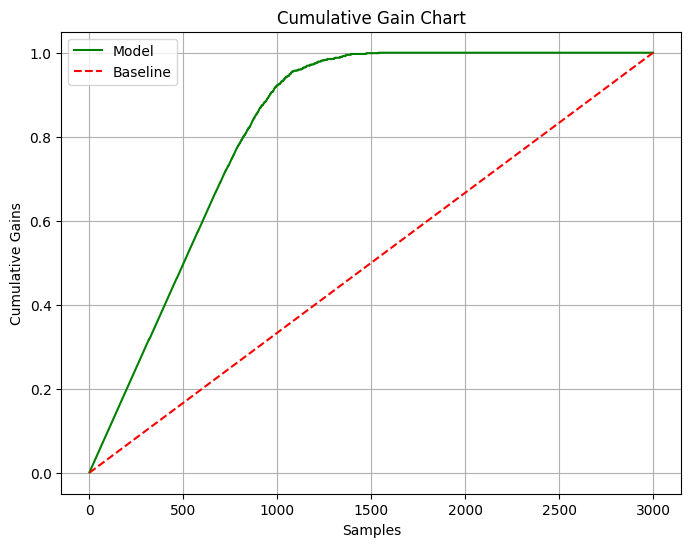

In [21]:
# Cumulative Gain Chart
def plot_cumulative_gain(y_true, y_prob):
    y_true = np.array(y_true)  # Ensure y_true is a NumPy array
    sorted_indices = np.argsort(y_prob)[::-1]  # Sort probabilities in descending order
    y_sorted = y_true[sorted_indices]
    cumulative = np.cumsum(y_sorted) / y_sorted.sum()
    cumulative_baseline = np.linspace(0, 1, len(cumulative))

    plt.figure(figsize=(8, 6))
    plt.plot(cumulative, label="Model", color="green")
    plt.plot(cumulative_baseline, label="Baseline", color="red", linestyle="--")
    plt.title("Cumulative Gain Chart")
    plt.xlabel("Samples")
    plt.ylabel("Cumulative Gains")
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with corrected y_test
plot_cumulative_gain(y_test.values, gb_clf.predict_proba(X_test)[:, 1])

<ipython-input-22-dfb897a87d48>:8: RuntimeWarning: divide by zero encountered in divide
  lift = cumulative / cumulative_baseline


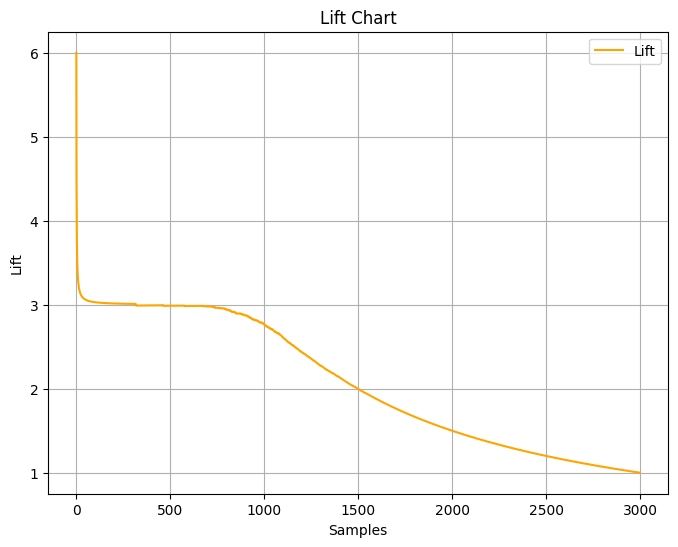

In [22]:
# Lift Chart
def plot_lift_chart(y_true, y_prob):
    y_true = np.array(y_true)  # Ensure y_true is a NumPy array
    sorted_indices = np.argsort(y_prob)[::-1]
    y_sorted = y_true[sorted_indices]
    cumulative = np.cumsum(y_sorted) / y_sorted.sum()
    cumulative_baseline = np.linspace(0, 1, len(cumulative))
    lift = cumulative / cumulative_baseline

    plt.figure(figsize=(8, 6))
    plt.plot(range(len(lift)), lift, label="Lift", color="orange")
    plt.title("Lift Chart")
    plt.xlabel("Samples")
    plt.ylabel("Lift")
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with corrected y_test
plot_lift_chart(y_test.values, gb_clf.predict_proba(X_test)[:, 1])

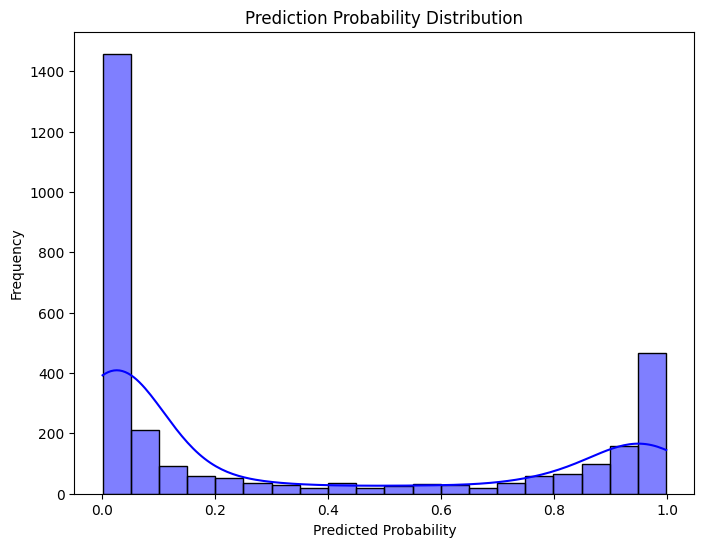

In [23]:
# 3. Prediction Probability Distribution
y_probs = gb_clf.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
sns.histplot(y_probs, kde=True, color="blue", bins=20)
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()